In [13]:
pip install requests beautifulsoup4 openpyxl selenium


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.5 MB 12.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/9.5 MB 18.2 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.5 MB 23.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.5 MB 27.4 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.5 MB 30.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.2/9.5 MB 30.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.5 MB 33.7 MB/s eta 0:00:01
   ---------------------------------------  9.5/9.5 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 26.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/467.2 kB ? eta -:--:--
   --------------------------------------- 467.2/467.2 kB 30.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   --------------

In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

def fetch_tide_data_with_selenium(url):
    s = Service(r'C:\Users\Nilton Sainz\Desktop\Universidade\Especialização - Ciências de Dados e Big Data\Programação Python\chromedriver.exe')  # Ajuste para o caminho do seu chromedriver
    driver = webdriver.Chrome(service=s)
    driver.get(url)

    try:
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/section[2]/div/div[1]/div[1]/div/table'))
        )
        # Capturando os cabeçalhos da tabela usando o XPath absoluto
        headers = [th.get_attribute('textContent').strip() for th in driver.find_elements(By.XPATH, "/html/body/section[2]/div/div[1]/div[1]/div/table/thead/tr/th")]
        print("Headers:", headers)  # Debug para ver os cabeçalhos

        # Capturando os dados da tabela
        rows = driver.find_elements(By.XPATH, "/html/body/section[2]/div/div[1]/div[1]/div/table/tbody/tr")
        data = []
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, 'td')
            row_data = {headers[i]: col.get_attribute('textContent').strip() for i, col in enumerate(cols)}
            data.append(row_data)

        # Convertendo os dados para DataFrame e salvando em Excel
        df = pd.DataFrame(data)
        print(df)  # Exibe o DataFrame para verificar os dados
        df.to_excel('dados_mare.xlsx', index=False)  # Salva os dados em um arquivo Excel
    except Exception as e:
        print(f"Erro ao extrair dados: {str(e)}")
    finally:
        driver.quit()

# Exemplo de uso
url = "https://www.rgpilots.com.br/"
fetch_tide_data_with_selenium(url)

Headers: ['DD HH:MM', 'Previsão', 'Medição']
             DD HH:MM Previsão Medição
0    15/05/2024 01:45             1.41
1    15/05/2024 01:50             1.41
2    15/05/2024 01:55             1.39
3    15/05/2024 02:00     0.47    1.39
4    15/05/2024 02:05     0.47    1.40
..                ...      ...     ...
145  15/05/2024 21:00     0.25       -
146  15/05/2024 22:00     0.26       -
147  15/05/2024 23:00     0.28       -
148  16/05/2024 00:00     0.33       -
149  16/05/2024 01:00     0.40       -

[150 rows x 3 columns]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Carregando os dados do arquivo Excel
df = pd.read_excel('dados_mare.xlsx')

In [31]:
print(df.head())

           DD HH:MM  Previsão Medição
0  15/05/2024 01:25       NaN    1.43
1  15/05/2024 01:30       NaN    1.43
2  15/05/2024 01:35       NaN    1.43
3  15/05/2024 01:40       NaN    1.42
4  15/05/2024 01:45       NaN    1.41


In [32]:
import numpy as np

# Carregando os dados do arquivo Excel
df = pd.read_excel('dados_mare.xlsx')

# Converter a coluna 'DD HH:MM' para datetime para melhor manipulação
df['DD HH:MM'] = pd.to_datetime(df['DD HH:MM'], format='%d/%m/%Y %H:%M')

# Substituir valores '-' por NaN
df['Medição'] = df['Medição'].replace('-', np.nan)

# Converter a coluna 'Medição' para float
df['Medição'] = df['Medição'].astype(float)

# Adicionar 1.36 à coluna 'Medição'
df['Medição'] = df['Medição'] + 1.36

# Opcional: Remover linhas com valores NaN
df = df.dropna(subset=['Medição'])

# Exibir as primeiras linhas do DataFrame para verificar o resultado
print(df.head())


             DD HH:MM  Previsão  Medição
0 2024-05-15 01:25:00       NaN     2.79
1 2024-05-15 01:30:00       NaN     2.79
2 2024-05-15 01:35:00       NaN     2.79
3 2024-05-15 01:40:00       NaN     2.78
4 2024-05-15 01:45:00       NaN     2.77


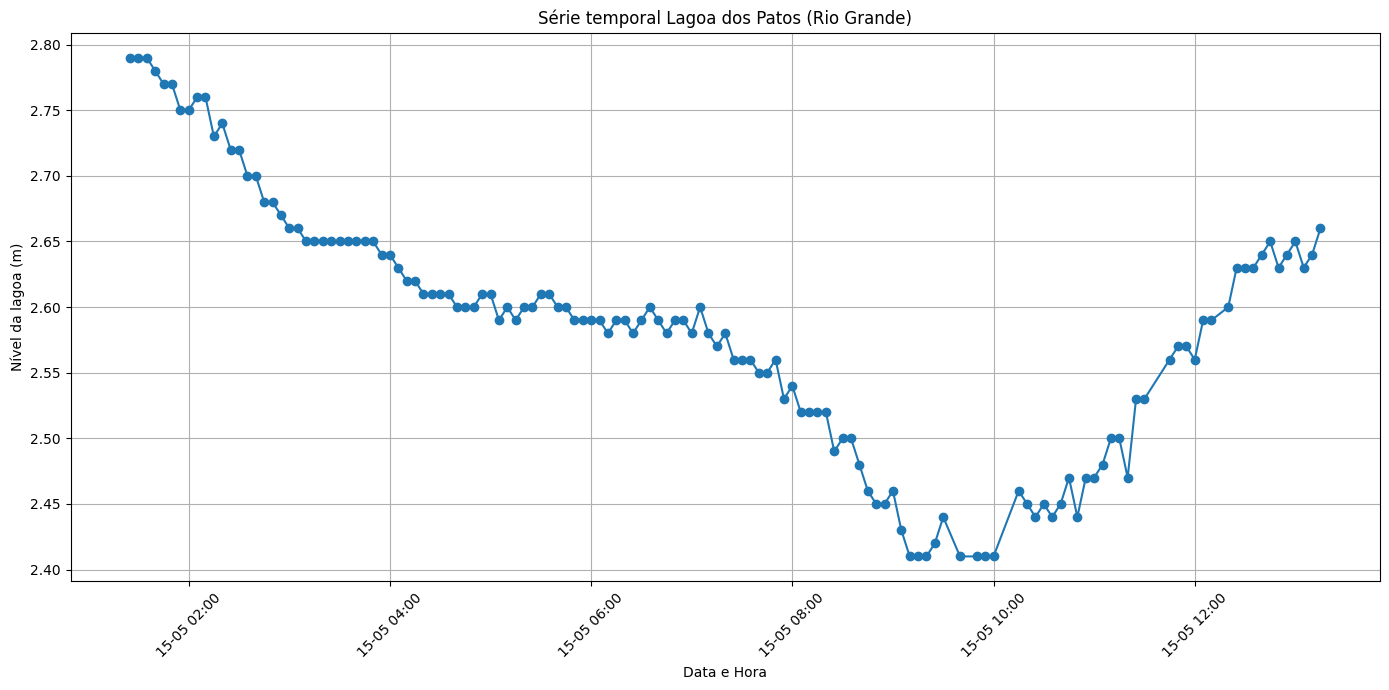

In [33]:
# Converter a coluna 'DD HH:MM' para datetime para melhor manipulação
df['DD HH:MM'] = pd.to_datetime(df['DD HH:MM'], format='%d/%m/%Y %H:%M')

# Substituir valores '-' por NaN (se necessário)
df['Medição'] = df['Medição'].replace('-', pd.NA)

# Converter a coluna 'Medição' para float
df['Medição'] = df['Medição'].astype(float)

# Remover linhas com valores NaN
df = df.dropna(subset=['Medição'])

# Criar o gráfico de linha
plt.figure(figsize=(14, 7))
plt.plot(df['DD HH:MM'], df['Medição'], marker='o', linestyle='-')

# Formatar o eixo x para mostrar dia, mês, hora e minuto
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m %H:%M'))

# Adicionar títulos e rótulos
plt.title('Série temporal Lagoa dos Patos (Rio Grande)')
plt.xlabel('Data e Hora')
plt.ylabel('Nível da lagoa (m)')
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


In [35]:
import os

In [36]:
# Imprime o diretório de trabalho atual
print("Diretório atual:", os.getcwd())

Diretório atual: c:\Users\Nilton Sainz\Desktop\Universidade\Especialização - Ciências de Dados e Big Data\Programação Python
Arquivos no diretório atual: ['# Pede ao usuário para inserir a idade.py', '#Quiz2.py', '0102_BD_T&D_T-PC-R_2013-2020_Consolidado.txt', 'Anotações Aula 1.txt', 'Aula-Pandas.ipynb', 'chromedriver.exe', 'dados_mare.xlsx', 'documento.txt', 'dsbd_trab1.csv', 'exemplo.csv', 'Lagoa_dos_Patos_RG.ipynb', 'LICENSE.chromedriver', 'matriz.csv', 'Q3.py', 'Trabalho Final', 'venv']


In [38]:
import numpy as np

# Carregando os dados do arquivo Excel
df = pd.read_excel('dados_mare.xlsx')

# Converter a coluna 'DD HH:MM' para datetime para melhor manipulação
df['DD HH:MM'] = pd.to_datetime(df['DD HH:MM'], format='%d/%m/%Y %H:%M')

# Substituir valores '-' por NaN
df['Medição'] = df['Medição'].replace('-', np.nan)

# Converter a coluna 'Medição' para float
df['Medição'] = df['Medição'].astype(float)

# Adicionar 1.36 à coluna 'Medição'
df['Medição'] = df['Medição'] + 1.36

# Opcional: Remover linhas com valores NaN
df = df.dropna(subset=['Medição'])

# Exibir as primeiras linhas do DataFrame para verificar o resultado
print(df.head())

             DD HH:MM  Previsão  Medição
0 2024-05-15 01:45:00       NaN     2.77
1 2024-05-15 01:50:00       NaN     2.77
2 2024-05-15 01:55:00       NaN     2.75
3 2024-05-15 02:00:00      0.47     2.75
4 2024-05-15 02:05:00      0.47     2.76


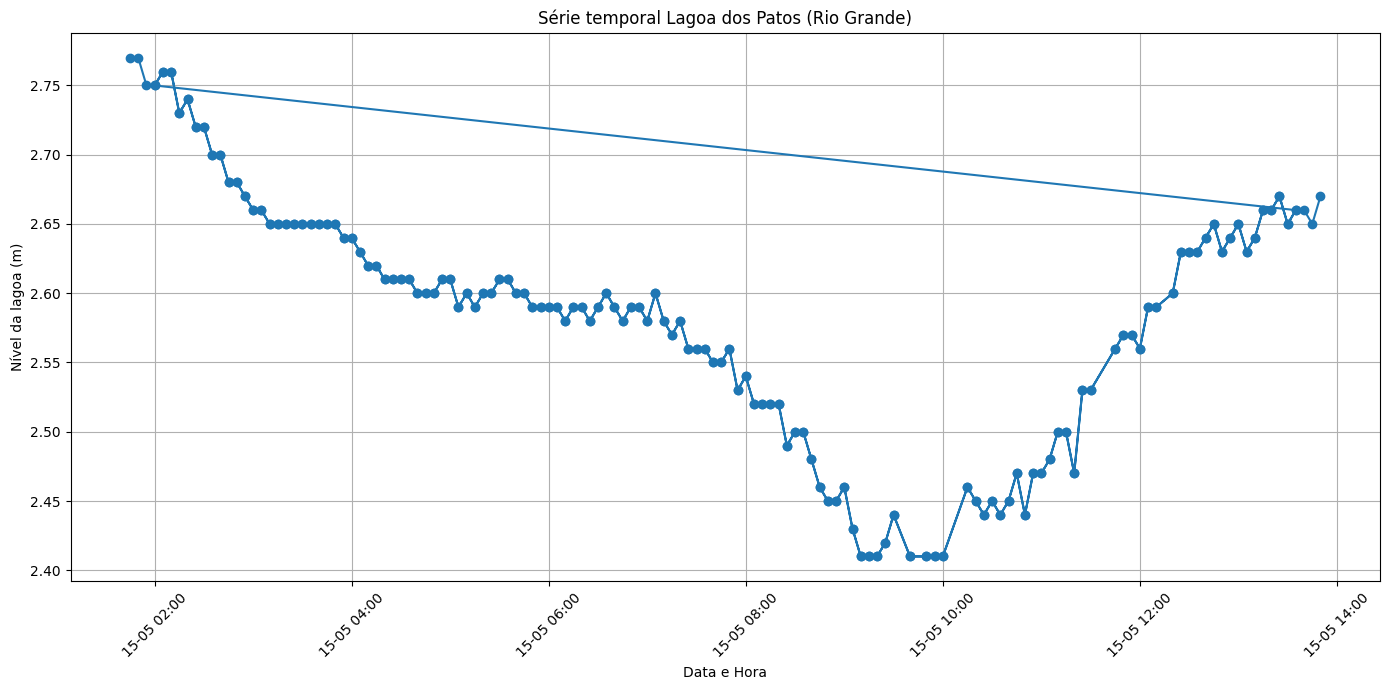

In [39]:
# Converter a coluna 'DD HH:MM' para datetime para melhor manipulação
df['DD HH:MM'] = pd.to_datetime(df['DD HH:MM'], format='%d/%m/%Y %H:%M')

# Substituir valores '-' por NaN (se necessário)
df['Medição'] = df['Medição'].replace('-', pd.NA)

# Converter a coluna 'Medição' para float
df['Medição'] = df['Medição'].astype(float)

# Remover linhas com valores NaN
df = df.dropna(subset=['Medição'])

# Criar o gráfico de linha
plt.figure(figsize=(14, 7))
plt.plot(df['DD HH:MM'], df['Medição'], marker='o', linestyle='-')

# Formatar o eixo x para mostrar dia, mês, hora e minuto
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m %H:%M'))

# Adicionar títulos e rótulos
plt.title('Série temporal Lagoa dos Patos (Rio Grande)')
plt.xlabel('Data e Hora')
plt.ylabel('Nível da lagoa (m)')
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

In [41]:
pip install schedule 

Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Nilton Sainz\\Desktop\\Universidade\\Especialização - Ciências de Dados e Big Data\\Programação Python\\static\\grafico.png'

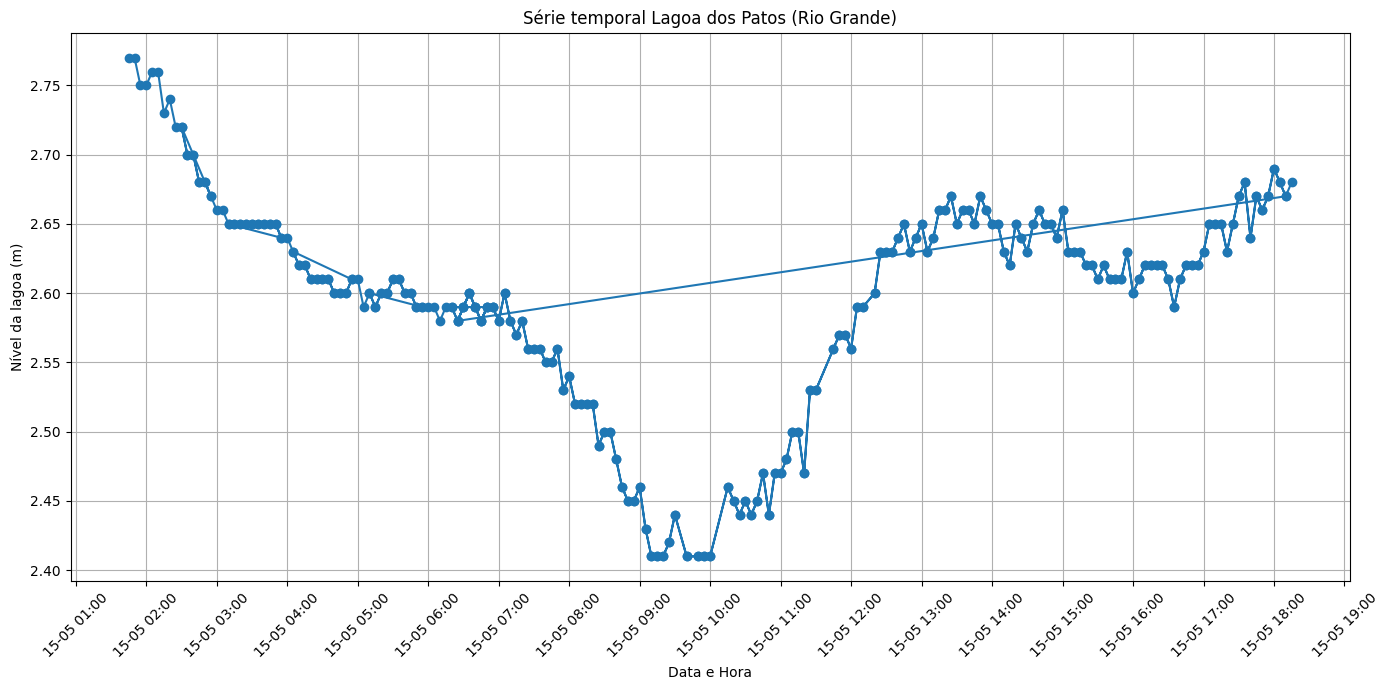

In [61]:
import time
import schedule
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def fetch_and_process_data():
    url = "https://www.rgpilots.com.br/"
    service = Service(r'C:\Users\Nilton Sainz\Desktop\Universidade\Especialização - Ciências de Dados e Big Data\Programação Python\chromedriver.exe')
    driver = webdriver.Chrome(service=service)
    driver.get(url)

    try:
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/section[2]/div/div[1]/div[1]/div/table'))
        )
        headers = [th.get_attribute('textContent').strip() for th in driver.find_elements(By.XPATH, "/html/body/section[2]/div/div[1]/div[1]/div/table/thead/tr/th")]
        rows = driver.find_elements(By.XPATH, "/html/body/section[2]/div/div[1]/div[1]/div/table/tbody/tr")
        data = []
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, 'td')
            row_data = {headers[i]: col.get_attribute('textContent').strip() for i, col in enumerate(cols)}
            data.append(row_data)

        new_df = pd.DataFrame(data)
        try:
            existing_df = pd.read_excel('dados_mare.xlsx')
            combined_df = pd.concat([existing_df, new_df]).drop_duplicates(subset=headers, keep='last')
            combined_df.to_excel('dados_mare.xlsx', index=False)
        except FileNotFoundError:
            new_df.to_excel('dados_mare.xlsx', index=False)

    except Exception as e:
        print(f"Erro ao extrair dados: {str(e)}")
    finally:
        driver.quit()

    # Carregar e processar os dados
    df = pd.read_excel('dados_mare.xlsx')
    df['DD HH:MM'] = pd.to_datetime(df['DD HH:MM'], format='%d/%m/%Y %H:%M')
    df['Medição'] = df['Medição'].replace('-', np.nan).astype(float).add(1.36)
    df = df.dropna(subset=['Medição'])

    plt.figure(figsize=(14, 7))
    plt.plot(df['DD HH:MM'], df['Medição'], marker='o', linestyle='-')

    # Configurando o formato da data no eixo x e espaçamento dos ticks
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

    plt.title('Série temporal Lagoa dos Patos (Rio Grande)')
    plt.xlabel('Data e Hora')
    plt.ylabel('Nível da lagoa (m)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig('grafico.png')  # Salvar o gráfico como imagem
    plt.close()

# Agendar a tarefa para rodar a cada 10 minutos
schedule.every(10).minutes.do(fetch_and_process_data)

while True:
    schedule.run_pending()
    time.sleep(1)

In [58]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Exception in thread Thread-20 (run_schedule):
Traceback (most recent call last):
  File "c:\Users\Nilton Sainz\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\Nilton Sainz\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Nilton Sainz\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Nilton Sainz\AppData\Local\Temp\ipykernel_11132\852793462.py", line 65, in run_schedule
  File "c:\Users\Nilton Sainz\AppData\Local\Programs\Python\Python312\Lib\site-packages\schedule\__init__.py", line 822, in run_pending
    default_scheduler.run_pending()
  File "c:\Users\Nilton Sainz\AppData\Local\Programs\Python\Python312\Lib\site-packages\schedule\__init__.py", line 100, in run_pending
    self._run_job(job)
  File "c:\Users\Nilton Sainz\AppData

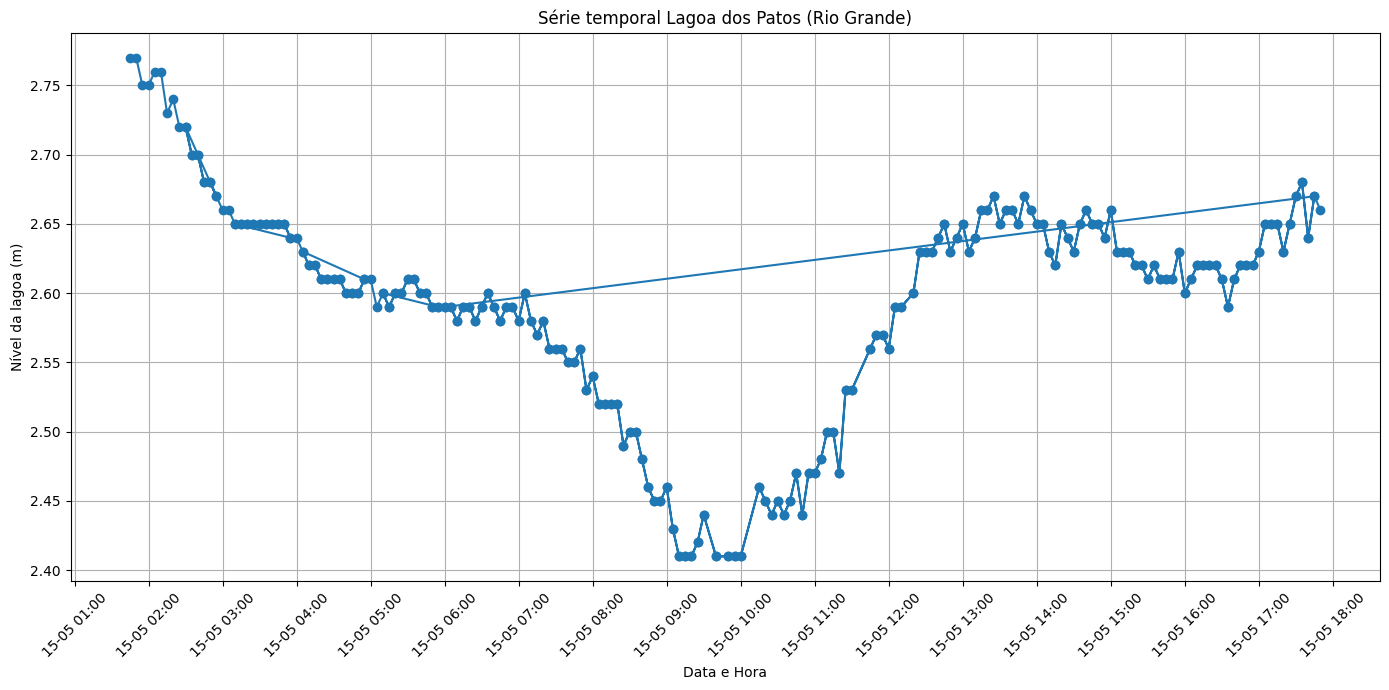

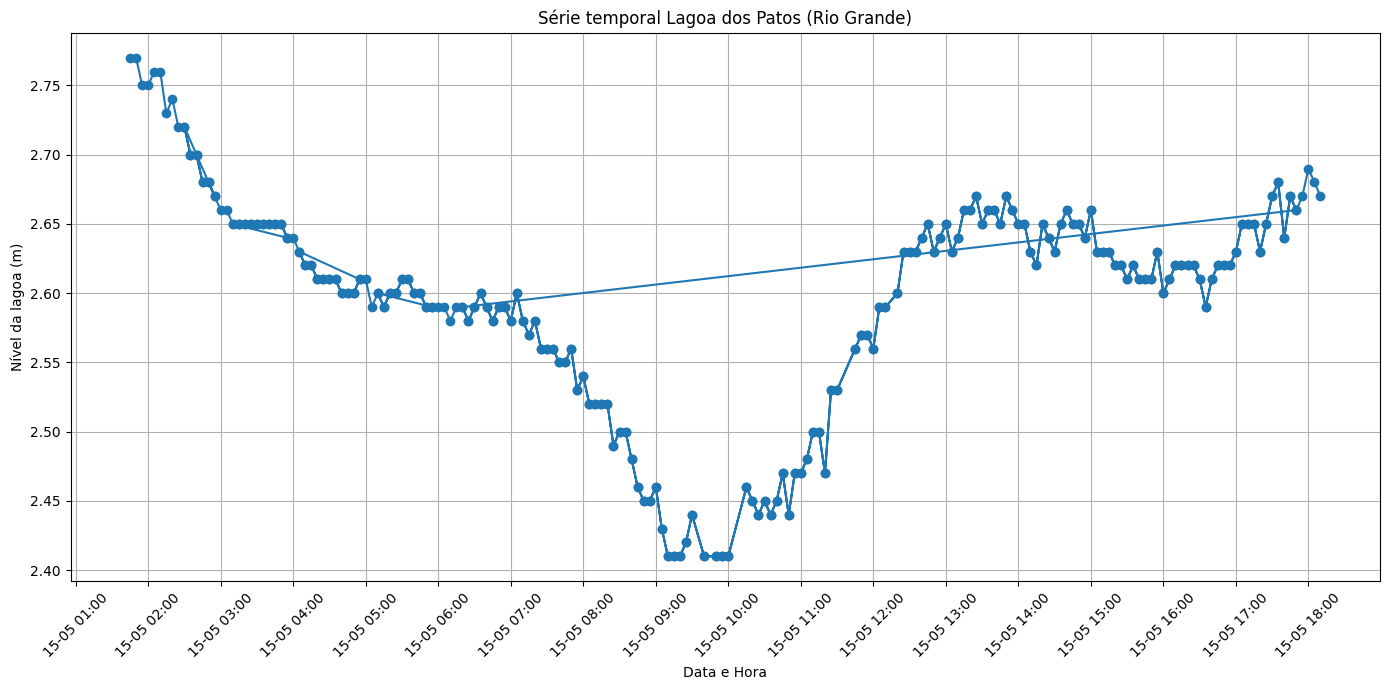

In [60]:
from flask import Flask, send_file
import threading
import time
import schedule

app = Flask(__name__)

def fetch_and_process_data():
    url = "https://www.rgpilots.com.br/"
    service = Service(r'C:\Users\Nilton Sainz\Desktop\Universidade\Especialização - Ciências de Dados e Big Data\Programação Python\chromedriver.exe')
    driver = webdriver.Chrome(service=service)
    driver.get(url)

    try:
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/section[2]/div/div[1]/div[1]/div/table'))
        )
        headers = [th.get_attribute('textContent').strip() for th in driver.find_elements(By.XPATH, "/html/body/section[2]/div/div[1]/div[1]/div/table/thead/tr/th")]
        rows = driver.find_elements(By.XPATH, "/html/body/section[2]/div/div[1]/div[1]/div/table/tbody/tr")
        data = []
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, 'td')
            row_data = {headers[i]: col.get_attribute('textContent').strip() for i, col in enumerate(cols)}
            data.append(row_data)

        new_df = pd.DataFrame(data)
        try:
            existing_df = pd.read_excel('dados_mare.xlsx')
            combined_df = pd.concat([existing_df, new_df]).drop_duplicates(subset=headers, keep='last')
            combined_df.to_excel('dados_mare.xlsx', index=False)
        except FileNotFoundError:
            new_df.to_excel('dados_mare.xlsx', index=False)

    except Exception as e:
        print(f"Erro ao extrair dados: {str(e)}")
    finally:
        driver.quit()

    # Carregar e processar os dados
    df = pd.read_excel('dados_mare.xlsx')
    df['DD HH:MM'] = pd.to_datetime(df['DD HH:MM'], format='%d/%m/%Y %H:%M')
    df['Medição'] = df['Medição'].replace('-', np.nan).astype(float).add(1.36)
    df = df.dropna(subset=['Medição'])

    plt.figure(figsize=(14, 7))
    plt.plot(df['DD HH:MM'], df['Medição'], marker='o', linestyle='-')

    # Configurando o formato da data no eixo x e espaçamento dos ticks
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))

    plt.title('Série temporal Lagoa dos Patos (Rio Grande)')
    plt.xlabel('Data e Hora')
    plt.ylabel('Nível da lagoa (m)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig('static/grafico.png')  # Salvar o gráfico como imagem na pasta static
    plt.close()

def run_schedule():
    schedule.every(10).minutes.do(fetch_and_process_data)
    while True:
        schedule.run_pending()
        time.sleep(1)

@app.route('/')
def home():
    return send_file('static/grafico.png', mimetype='image/png')

if __name__ == '__main__':
    threading.Thread(target=run_schedule).start()
    app.run(debug=True, use_reloader=False)